In [2]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [26]:
wine_quality <- read_csv2("https://raw.githubusercontent.com/choialice707/DSCI-100-Group56-Proj/main/winequality-red.csv")                                                                                                                                                                                                                     
wine_quality_filtered <- wine_quality |>
            mutate(quality = as_factor(quality)) |>
            filter(alcohol < 150)
head(wine_quality_filtered)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5


In [27]:
Mu Ye you can make your summary plot here

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: Mu Ye
       ^


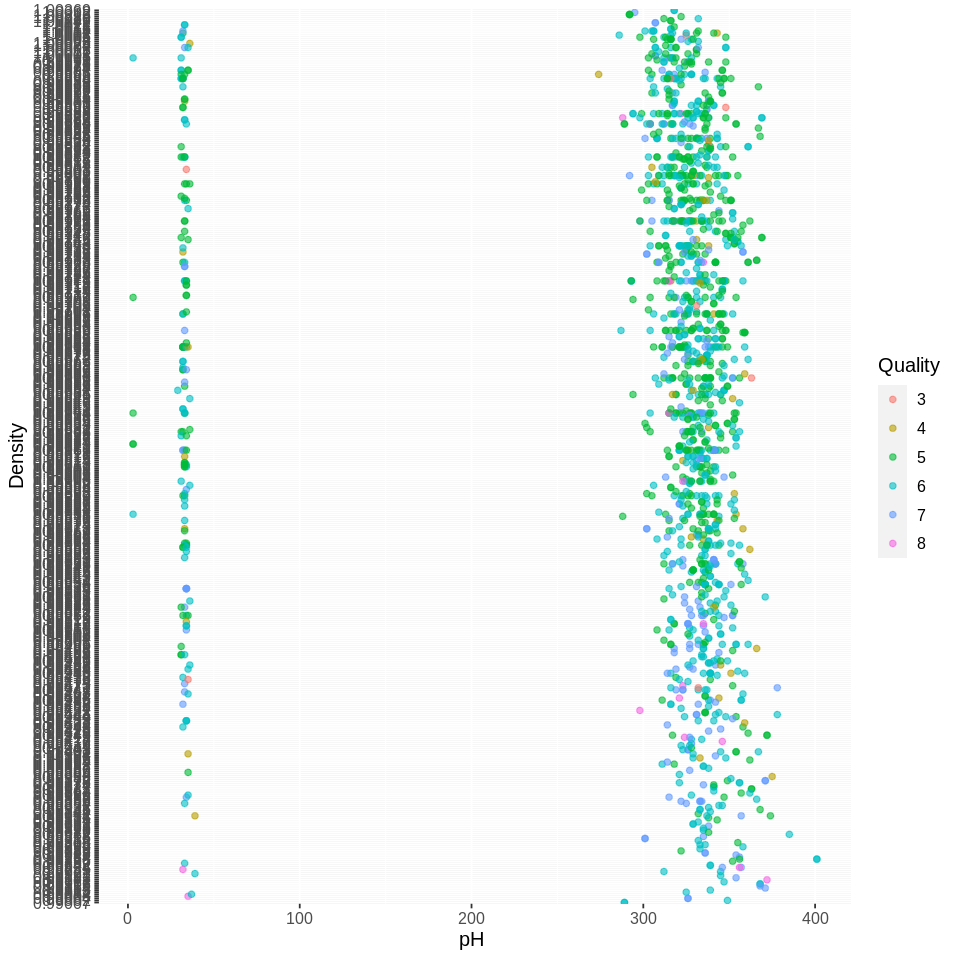

In [19]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_plot1 <- wine_quality |>
  ggplot(aes(x = pH, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "pH ", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot1

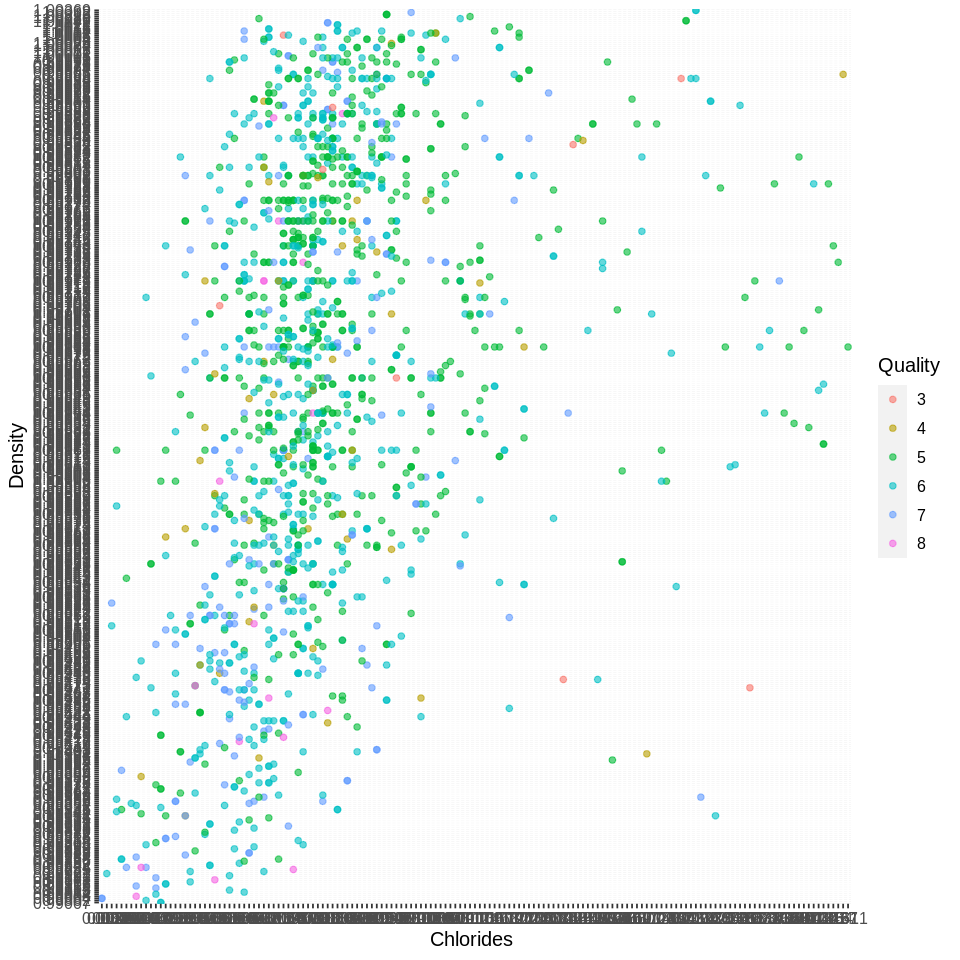

In [20]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_plot2 <- wine_quality |>
  ggplot(aes(x = chlorides, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Chlorides ", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot2

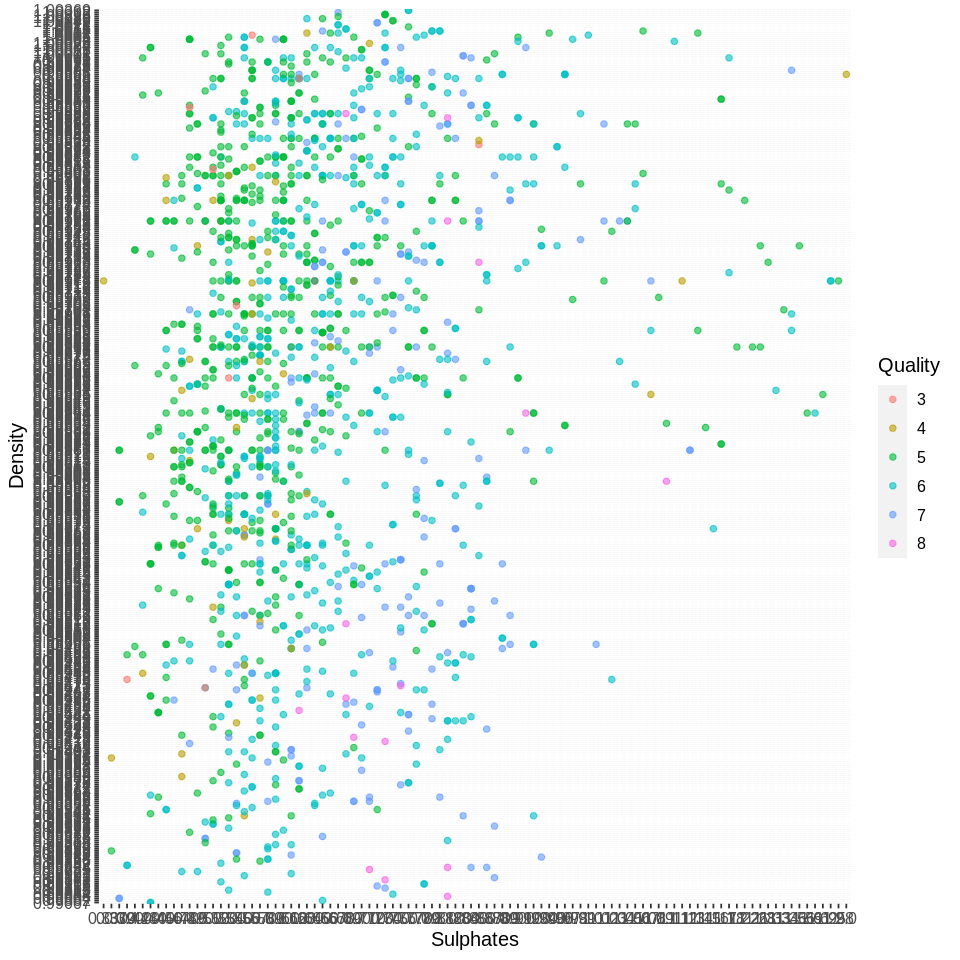

In [21]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_plot3 <- wine_quality |>
  ggplot(aes(x = sulphates, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot3

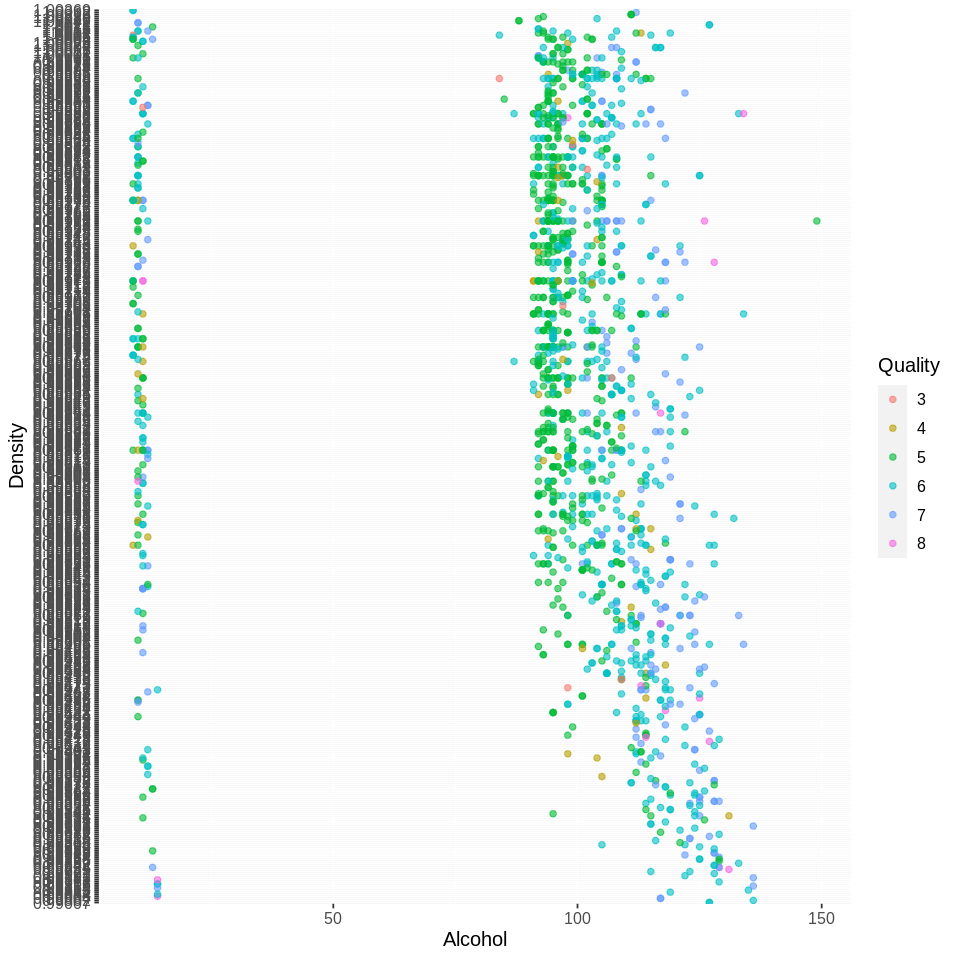

In [22]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_plot4 <- wine_quality |>
  ggplot(aes(x = alcohol, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot4

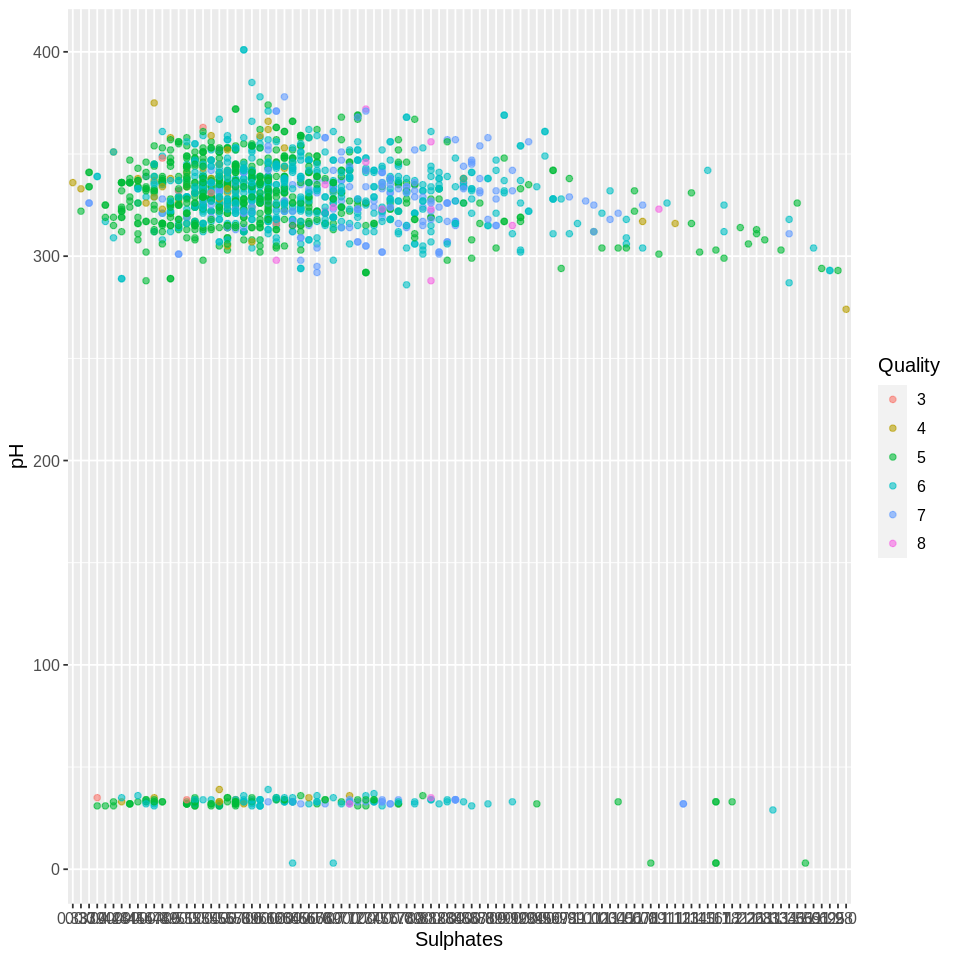

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_plot5 <- wine_quality |>
  ggplot(aes(x = sulphates, y = pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot5

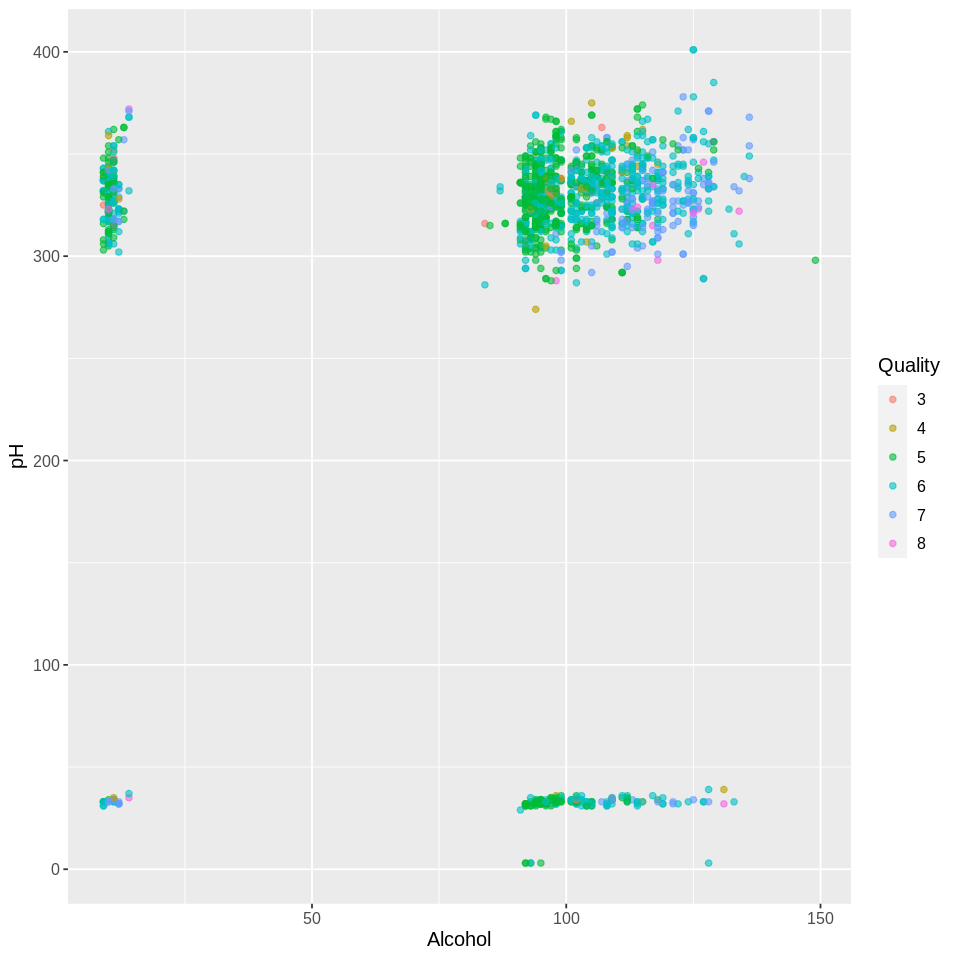

In [25]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_plot6 <- wine_quality |>
  ggplot(aes(x = alcohol, y = pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 12))

wine_plot6